In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from textwrap import wrap

In [3]:
root = "/content/drive/MyDrive/UVA MSDS/Capstone - Albemarle County Public Schools/Data/"
read_path = os.path.join(root, "Reading_Dataset_UVA_Deidentified_02-02-24.xlsx")
read_df = pd.read_excel(read_path)
# print(read_df.columns)
# read_df = read_df.dropna(subset=['Value Added Score', 'Expected Achievement'])#[read_df[['Value Added Score', 'Expected Achievement']].dropna()]
# print(read_df.isna().any())

math_path = os.path.join(root, "Math_Dataset_UVA_Deidentified_03-18-24.xlsx")
math_df = pd.read_excel(math_path)
# print(math_df.columns)
# print(math_df.isna().any())


In [4]:
all_df = pd.concat([read_df.rename(columns={'Type of Certification': 'Type of Teacher Certification'}), math_df])
all_df['Type of Teacher Certification'] = all_df['Type of Teacher Certification'].replace({np.nan: "NO_CERT"})

print(all_df['Type of Teacher Certification'])


0         MICRO
1         MICRO
2         MICRO
3         MICRO
4         MICRO
         ...   
3707    NO_CERT
3708    NO_CERT
3709    NO_CERT
3710    NO_CERT
3711    NO_CERT
Name: Type of Teacher Certification, Length: 8513, dtype: object


# grade breakdown for students

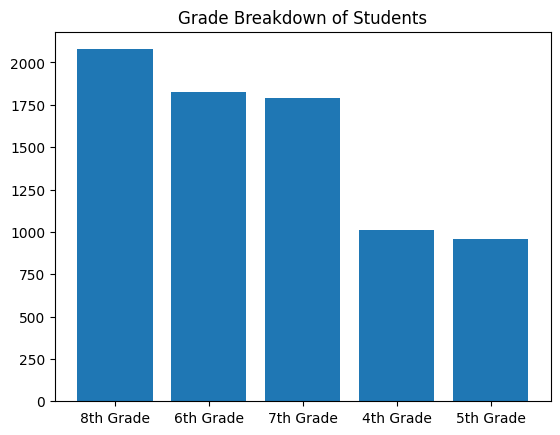

In [ ]:
students_grade_dict = all_df['Grade'].value_counts().to_dict()
plt.bar(range(len(students_grade_dict)), list(students_grade_dict.values()), align='center');
plt.xticks(range(len(students_grade_dict)), ['\n'.join(wrap(x, 12)) for x in list(students_grade_dict.keys())]);
plt.title(f"Grade Breakdown of Students");

# race breakdown for students

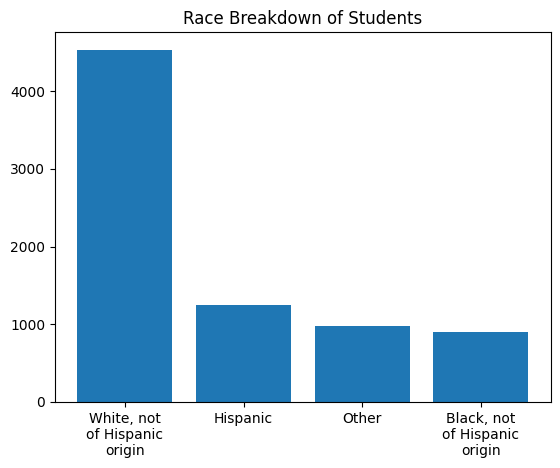

In [ ]:
students_race_dict = all_df['Race'].value_counts().to_dict()
plt.bar(range(len(students_race_dict)), list(students_race_dict.values()), align='center');
plt.xticks(range(len(students_race_dict)), ['\n'.join(wrap(x, 12)) for x in list(students_race_dict.keys())]);
plt.title(f"Race Breakdown of Students");

## race breakdown of students by grades

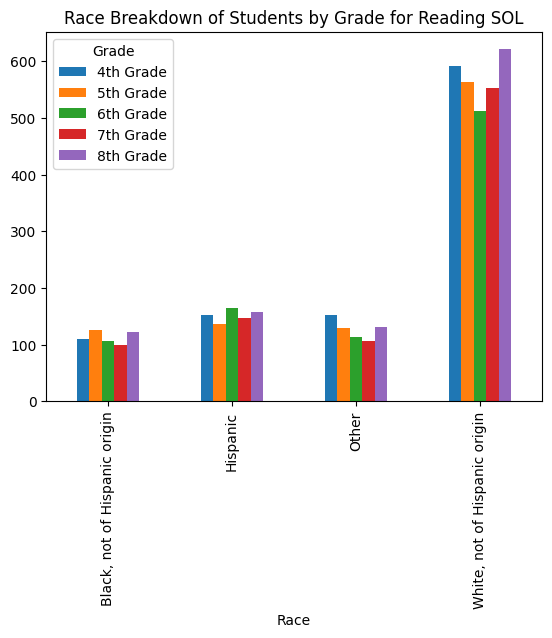

In [ ]:
students_race_grade = read_df[['Race', 'Grade']].groupby('Grade').value_counts()#.to_dict()
students_race_grade.unstack(0).plot.bar();
plt.title(f"Race Breakdown of Students by Grade for Reading SOL");

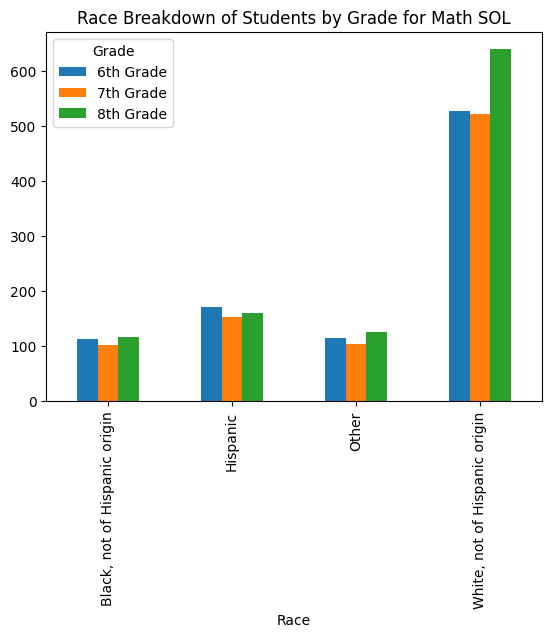

In [ ]:
students_race_grade = math_df[['Race', 'Grade']].groupby('Grade').value_counts()#.to_dict()
students_race_grade.unstack(0).plot.bar();
plt.title(f"Race Breakdown of Students by Grade for Math SOL");

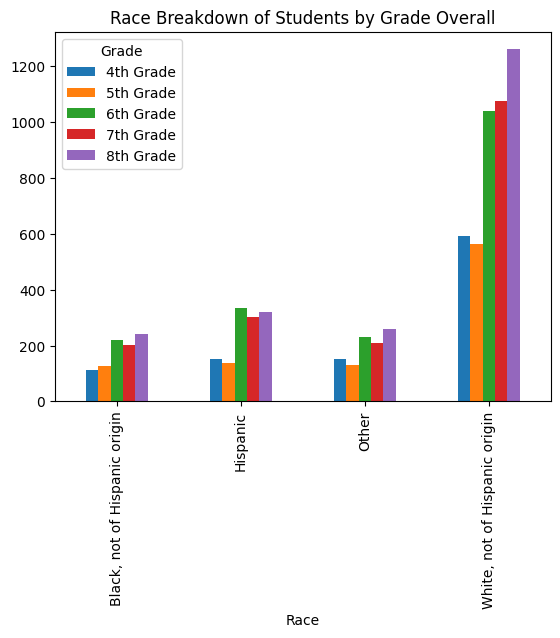

In [ ]:
students_race_grade = all_df[['Race', 'Grade']].groupby('Grade').value_counts()#.to_dict()
students_race_grade.unstack(0).plot.bar();
plt.title(f"Race Breakdown of Students by Grade Overall");

# race vs english learning students

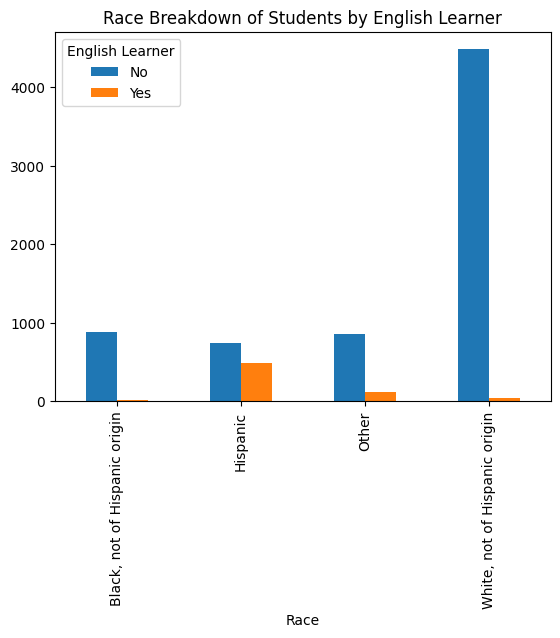

In [ ]:
students_race_english = all_df[['Race', 'English Learner']].groupby('English Learner').value_counts()#.to_dict()
students_race_english.unstack(0).plot.bar();
plt.title(f"Race Breakdown of Students by English Learner");

# students' race vs expected test scores

                               Race  Expected Achievement
0                          Hispanic            302.576620
1                          Hispanic            330.919437
2                          Hispanic            317.406887
3                             Other            317.130028
4                          Hispanic            321.686297
...                             ...                   ...
2851                       Hispanic            347.854254
2852  White, not of Hispanic origin            324.150790
2853  White, not of Hispanic origin            396.492662
2854  White, not of Hispanic origin            393.592653
2855                          Other            409.246049

[6929 rows x 2 columns]


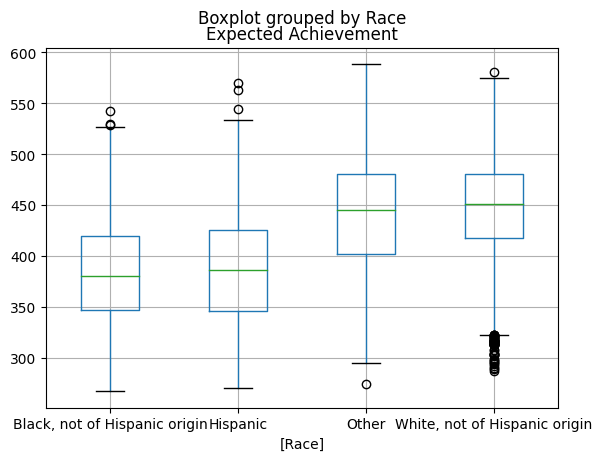

In [ ]:
students_race_expected = all_df[['Race', 'Expected Achievement']].dropna()#.groupby("Race")
print(students_race_expected)
students_race_expected.boxplot(by='Race');

# students' race vs actual test scores

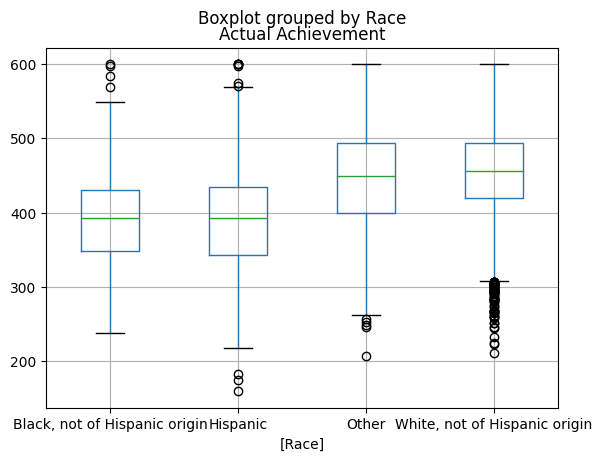

In [ ]:
students_race_actual = all_df[['Race', 'Actual Achievement']].dropna()
students_race_actual.boxplot(by='Race');

# race breakdown of teachers

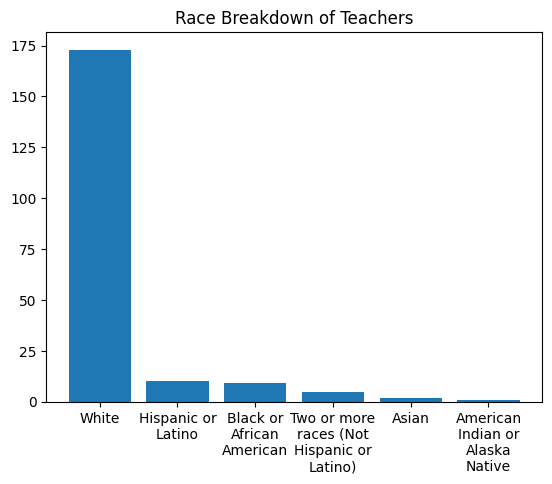

In [ ]:
teachers_race_dict = all_df.drop_duplicates(['Generated Unique Teacher ID'])['Teacher Race/Ethnicity'].value_counts().to_dict()
plt.bar(range(len(teachers_race_dict)), list(teachers_race_dict.values()), align='center');
plt.xticks(range(len(teachers_race_dict)), ['\n'.join(wrap(x, 12)) for x in list(teachers_race_dict.keys())]);
plt.title("Race Breakdown of Teachers");

# race vs certification for teachers

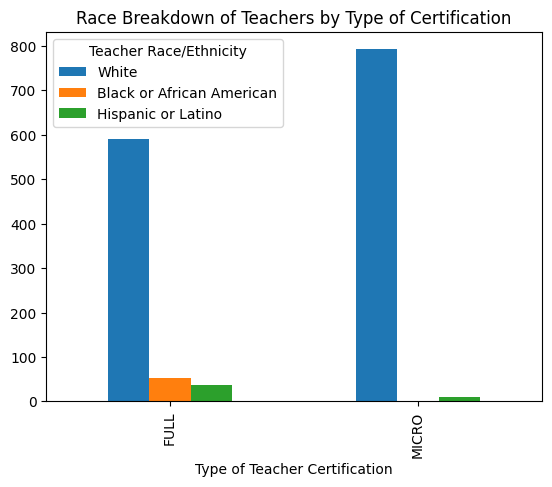

In [ ]:
teacher_race_certificate = all_df[['Teacher Race/Ethnicity', 'Type of Teacher Certification']].groupby('Type of Teacher Certification').value_counts()#.to_dict()
teacher_race_certificate.unstack().plot.bar();
plt.title(f"Race Breakdown of Teachers by Type of Certification");

# certification of teachers

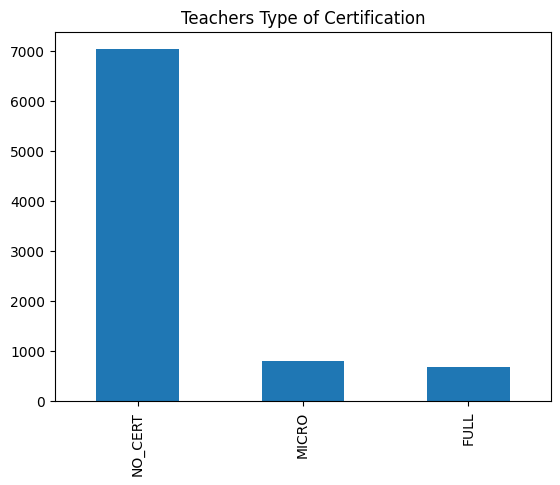

In [ ]:
teacher_certificate = all_df['Type of Teacher Certification'].value_counts()#.to_dict()
teacher_certificate.plot.bar();
plt.title(f"Teachers Type of Certification for both Math and Read");

# Multivariate linear regressions

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [ ]:
root = "/content/drive/MyDrive/UVA MSDS/Capstone - Albemarle County Public Schools/Data/"
read_path = os.path.join(root, "Reading_Dataset_UVA_Deidentified_02-02-24.xlsx")

math_path = os.path.join(root, "Math_Dataset_UVA_Deidentified_02-12-24.xlsx")

## reading - actual achievement

In [ ]:
read_df = pd.read_excel(read_path)
read_df = read_df.replace({np.nan: "none"})

In [ ]:
X = read_df[['Race', 'Gender', 'English Learner',
       'Students with Disabilities',
       'Teacher License Type',
       'Teacher Years Experience', 'Teacher Highest Degree',
       'Teacher Gender', 'Teacher Race/Ethnicity',
       'Certified Principal', 'Type of Principal Certification',
       'Certified Teacher', 'Type of Teacher Certification',
       'Year of Teacher Certification']]
X = pd.get_dummies(data=X)
y = read_df['Actual Achievement']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
read_regr_actual = linear_model.LinearRegression()
read_regr_actual.fit(X_train, y_train)

LinearRegression()

In [ ]:
read_regr_actual_int = read_regr_actual.intercept_
read_regr_actual_coeff_params = pd.DataFrame(read_regr_actual.coef_, X.columns, columns=['Coefficient'])
print(f"model intercept: {read_regr_actual_int}")
print()
print(read_regr_actual_coeff_params)

model intercept: 5418982538912232.0

                                       Coefficient
Race_Black, not of Hispanic origin    2.497409e+14
Race_Hispanic                         2.497409e+14
Race_Other                            2.497409e+14
Race_White, not of Hispanic origin    2.497409e+14
Gender_Female                        -2.170069e+15
...                                            ...
Year of Teacher Certification_2020.0 -1.033260e+14
Year of Teacher Certification_2021.0 -1.033260e+14
Year of Teacher Certification_2022.0 -1.033260e+14
Year of Teacher Certification_2023.0 -1.033260e+14
Year of Teacher Certification_none   -6.679026e+14

[84 rows x 1 columns]


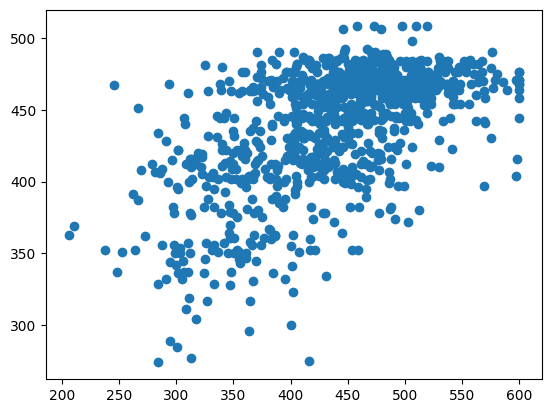

In [ ]:
read_regr_actual_pred = read_regr_actual.predict(X_test)
plt.scatter(y_test, read_regr_actual_pred)
plt.show()

In [ ]:
X_train_Sm = sm.add_constant(X_train)
X_train_Sm = sm.add_constant(X_train)
ls = sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:     Actual Achievement   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     31.63
Date:                Sat, 17 Feb 2024   Prob (F-statistic):          2.23e-295
Time:                        14:46:42   Log-Likelihood:                -20933.
No. Observations:                3840   AIC:                         4.199e+04
Df Residuals:                    3776   BIC:                         4.239e+04
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
                                                                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

## math - actual achievement

In [ ]:
math_df = pd.read_excel(math_path)
math_df = math_df.replace({np.nan: "none"})

In [ ]:
X = math_df[['Race', 'Gender', 'English Learner',
       'Students with Disabilities',
       'Certified Principal', 'Type of Principal Certification',
       'Teacher License Type',
       'Teacher Years Experience', 'Teacher Highest Degree',
       'Teacher Gender', 'Teacher Race/Ethnicity',
       'Certified Teacher', 'Type of Certification', 'Year of Certification']]
X = pd.get_dummies(data=X)
y = math_df['Actual Achievement']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
math_regr_actual = linear_model.LinearRegression()
math_regr_actual.fit(X_train, y_train)

LinearRegression()

In [ ]:
math_regr_actual_int = math_regr_actual.intercept_
math_regr_actual_coeff_params = pd.DataFrame(math_regr_actual.coef_, X.columns, columns=['Coefficient'])
print(f"model intercept: {math_regr_actual_int}")
print()
print(math_regr_actual_coeff_params)

model intercept: 335.8311152628023

                                                    Coefficient
Teacher Years Experience                               1.004065
Race_Black, not of Hispanic origin                   -28.561943
Race_Hispanic                                         -8.585252
Race_Other                                            17.849715
Race_White, not of Hispanic origin                    19.297480
Gender_Female                                         -2.746011
Gender_Male                                            2.746011
English Learner_No                                    26.126052
English Learner_Yes                                  -26.126052
Students with Disabilities_No                         23.729064
Students with Disabilities_Yes                       -23.729064
Certified Principal_N                                  0.671523
Certified Principal_Y                                 -0.671523
Type of Principal Certification_FULL                  -7.752904
Type

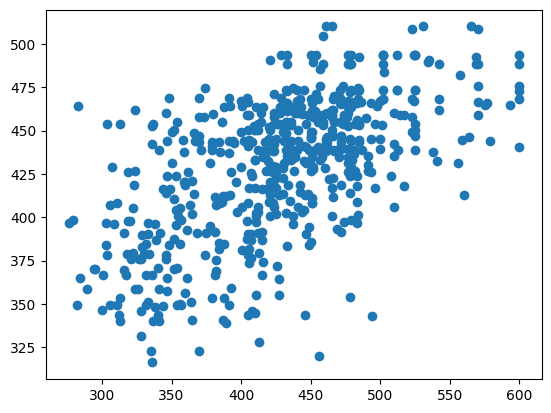

In [ ]:
math_regr_actual_pred = math_regr_actual.predict(X_test)
plt.scatter(y_test, math_regr_actual_pred)
plt.show()

In [ ]:
X_train_Sm = sm.add_constant(X_train)
X_train_Sm = sm.add_constant(X_train)
ls = sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:     Actual Achievement   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     54.03
Date:                Sat, 17 Feb 2024   Prob (F-statistic):          1.46e-208
Time:                        14:51:09   Log-Likelihood:                -12278.
No. Observations:                2286   AIC:                         2.461e+04
Df Residuals:                    2260   BIC:                         2.476e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

## reading - growth

In [ ]:
# X = read_df[['Race', 'Gender', 'English Learner',
#        'Students with Disabilities',
#        'Teacher License Type',
#        'Teacher Years Experience', 'Teacher Highest Degree',
#        'Teacher Gender', 'Teacher Race/Ethnicity',
#        'Certified Principal', 'Type of Principal Certification',
#        'Certified Teacher', 'Type of Teacher Certification',
#        'Year of Teacher Certification']]
# X = pd.get_dummies(data=X)
# y = read_df['Growth']

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
# read_regr_growth = linear_model.LinearRegression()
# read_regr_growth.fit(X_train, y_train)

In [ ]:
# read_regr_growth_int = read_regr_growth.intercept_
# read_regr_growth_coeff_params = pd.DataFrame(read_regr_growth.coef_, X.columns, columns=['Coefficient'])
# print(f"model intercept: {read_regr_growth_int}")
# print()
# print(read_regr_growth_coeff_params)

In [ ]:
# read_regr_growth_pred = read_regr_growth.predict(X_test)
# plt.scatter(y_test, read_regr_growth_pred)
# plt.show()

In [ ]:
# X_train_Sm = sm.add_constant(X_train)
# X_train_Sm = sm.add_constant(X_train)
# ls = sm.OLS(y_train,X_train_Sm).fit()
# print(ls.summary())

## math - growth

In [ ]:
math_df = pd.read_excel(math_path)
math_df = math_df.dropna(subset=['Growth'])
math_df = math_df.replace({np.nan: "none"})

In [ ]:
X = math_df[['Race', 'Gender', 'English Learner',
       'Students with Disabilities',
       'Certified Principal', 'Type of Principal Certification',
       'Teacher License Type',
       'Teacher Years Experience', 'Teacher Highest Degree',
       'Teacher Gender', 'Teacher Race/Ethnicity',
       'Certified Teacher', 'Type of Certification', 'Year of Certification']]
X = pd.get_dummies(data=X)
y = math_df['Growth']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
math_regr_growth = linear_model.LinearRegression()
math_regr_growth.fit(X_train, y_train)

In [ ]:
math_regr_growth_int = math_regr_growth.intercept_
math_regr_growth_coeff_params = pd.DataFrame(math_regr_growth.coef_, X.columns, columns=['Coefficient'])
print(f"model intercept: {math_regr_growth_int}")
print()
print(math_regr_growth_coeff_params)

In [ ]:
math_regr_growth_pred = math_regr_growth.predict(X_test)
plt.scatter(y_test, math_regr_growth_pred)
plt.show()

In [ ]:
X_train_Sm = sm.add_constant(X_train)
X_train_Sm = sm.add_constant(X_train)
ls = sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

# Math linear regressions - smaller feature set

In [ ]:
# X = math_df[['Race', 'Gender', 'English Learner',
#        'Students with Disabilities',
#        'Certified Principal', 'Type of Principal Certification',
#        'Teacher License Type',
#        'Teacher Years Experience', 'Teacher Highest Degree',
#        'Teacher Gender', 'Teacher Race/Ethnicity',
#        'Certified Teacher', 'Type of Certification', 'Year of Certification']]

## growth ~ certification

In [ ]:
math_df = pd.read_excel(math_path)
math_df = math_df.dropna(subset=['Growth'])
math_df = math_df.replace({np.nan: "none"})

X = math_df['Type of Certification']
X = pd.get_dummies(data=X)
y = math_df['Growth']

NameError: name 'pd' is not defined

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
math_regr_growth = linear_model.LinearRegression()
math_regr_growth.fit(X_train, y_train)

LinearRegression()

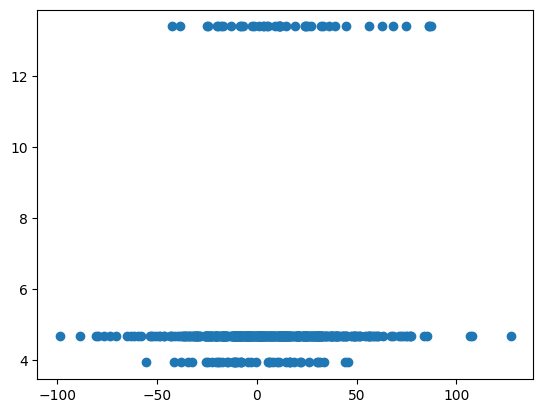

In [ ]:
math_regr_growth_pred = math_regr_growth.predict(X_test)
plt.scatter(y_test, math_regr_growth_pred)
plt.show()

In [ ]:
X_train_Sm = sm.add_constant(X_train)
X_train_Sm = sm.add_constant(X_train)
ls = sm.OLS(y_train,X_train_Sm).fit()
math_regr_growth_int = math_regr_growth.intercept_
print(f"model intercept: {math_regr_growth_int}")
print(ls.summary())

model intercept: 14.150491447176766
                            OLS Regression Results                            
Dep. Variable:                 Growth   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     8.813
Date:                Fri, 15 Mar 2024   Prob (F-statistic):           8.33e-06
Time:                        02:20:58   Log-Likelihood:                -10288.
No. Observations:                2080   AIC:                         2.058e+04
Df Residuals:                    2076   BIC:                         2.061e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.01

## growth ~ race

In [ ]:
math_df = pd.read_excel(math_path)
math_df = math_df.dropna()

X = math_df['Race']
X = pd.get_dummies(data=X)
y = math_df['Growth']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
math_regr_growth = linear_model.LinearRegression()
math_regr_growth.fit(X_train, y_train)

LinearRegression()

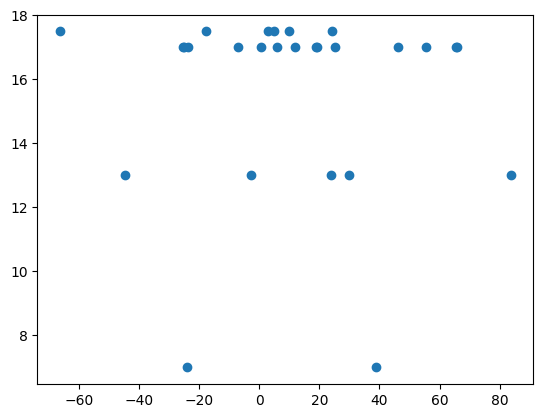

In [ ]:
math_regr_growth_pred = math_regr_growth.predict(X_test)
plt.scatter(y_test, math_regr_growth_pred)
plt.show()

In [ ]:
X_train_Sm = sm.add_constant(X_train)
X_train_Sm = sm.add_constant(X_train)
ls = sm.OLS(y_train,X_train_Sm).fit()
math_regr_growth_int = math_regr_growth.intercept_
print(f"model intercept: {math_regr_growth_int}")
print(ls.summary())

model intercept: 14.150491447176766
                            OLS Regression Results                            
Dep. Variable:                 Growth   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.114
Date:                Fri, 15 Mar 2024   Prob (F-statistic):              0.347
Time:                        02:10:29   Log-Likelihood:                -505.01
No. Observations:                 105   AIC:                             1018.
Df Residuals:                     101   BIC:                             1029.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

## growth ~ race, gender, english learner

In [ ]:
math_df = pd.read_excel(math_path)
math_df = math_df.dropna()

X = math_df[['Race', 'Gender', 'English Learner']]
X = pd.get_dummies(data=X)
y = math_df['Growth']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
math_regr_growth = linear_model.LinearRegression()
math_regr_growth.fit(X_train, y_train)

LinearRegression()

In [ ]:
# math_regr_growth_int = math_regr_growth.intercept_
# math_regr_growth_coeff_params = pd.DataFrame(math_regr_growth.coef_, X.columns, columns=['Coefficient'])
# print(f"model intercept: {math_regr_growth_int}")
# print()
# print(math_regr_growth_coeff_params)

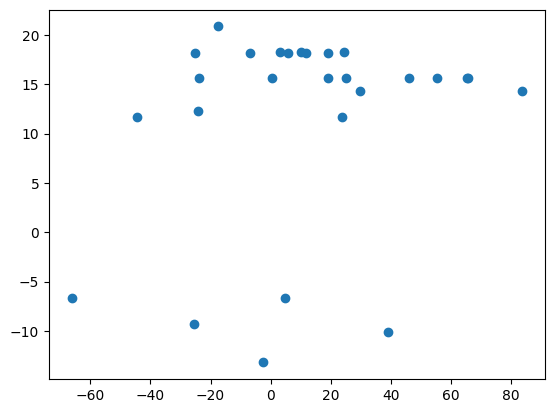

In [ ]:
math_regr_growth_pred = math_regr_growth.predict(X_test)
plt.scatter(y_test, math_regr_growth_pred)
plt.show()

In [ ]:
X_train_Sm = sm.add_constant(X_train)
X_train_Sm = sm.add_constant(X_train)
ls = sm.OLS(y_train,X_train_Sm).fit()
print(f"model intercept: {math_regr_growth_int}")
print(ls.summary())

model intercept: 14.150491447176766
                            OLS Regression Results                            
Dep. Variable:                 Growth   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     1.681
Date:                Fri, 15 Mar 2024   Prob (F-statistic):              0.146
Time:                        01:53:23   Log-Likelihood:                -502.44
No. Observations:                 105   AIC:                             1017.
Df Residuals:                      99   BIC:                             1033.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

## growth ~ Teacher License Type, Teacher Years Experience, Teacher Highest Degree, Teacher Gender, Teacher Race/Ethnicity, Certified Teacher, Type of Certification

In [ ]:
math_df = pd.read_excel(math_path)
math_df = math_df.dropna()
print(math_df.columns)

X = math_df[['Teacher License Type', 'Teacher Years Experience',
            'Teacher Highest Degree', 'Teacher Gender',
            'Teacher Race/Ethnicity', 'Certified Teacher',
            'Type of Certification']]

X = pd.get_dummies(data=X)
y = math_df['Growth']

Index(['Generated Unique Student ID', 'Race', 'Gender', 'English Learner',
       'Students with Disabilities', 'Grade', 'Test Name ',
       'Certified Principal', 'Type of Principal Certification',
       'Teacher License Type', 'Generated Unique Teacher ID',
       'Teacher Years Experience', 'Teacher Highest Degree',
       'Teacher Birth Year', 'Teacher Gender', 'Teacher Race/Ethnicity',
       'Certified Teacher', 'Type of Certification', 'Year of Certification',
       'Growth', 'Expected Achievement', 'Actual Achievement',
       'Vertical Scaled Score ', 'Actual Achievement Percentile',
       'Compacted Math'],
      dtype='object')


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
math_regr_growth = linear_model.LinearRegression()
math_regr_growth.fit(X_train, y_train)

LinearRegression()

In [ ]:
# math_regr_growth_int = math_regr_growth.intercept_
# math_regr_growth_coeff_params = pd.DataFrame(math_regr_growth.coef_, X.columns, columns=['Coefficient'])
# print(f"model intercept: {math_regr_growth_int}")
# print()
# print(math_regr_growth_coeff_params)

model intercept: 14.150491447176766

                                                  Coefficient
Teacher Years Experience                            -0.112053
Teacher License Type_Collegiate Professional        -2.422770
Teacher License Type_Postgraduate Professional       2.422770
Teacher Highest Degree_Bachelor's                   -2.422770
Teacher Highest Degree_Master's                      2.422770
Teacher Gender_Female                                0.000000
Teacher Race/Ethnicity_Black or African American    -4.556701
Teacher Race/Ethnicity_White                         4.556701
Certified Teacher_Y                                  0.000000
Type of Certification_FULL                          -2.422770
Type of Certification_MICRO                          2.422770


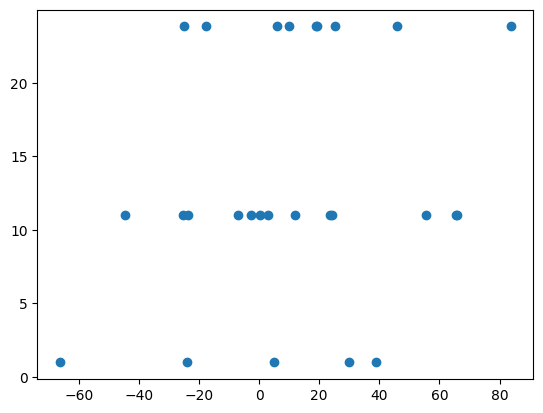

In [ ]:
math_regr_growth_pred = math_regr_growth.predict(X_test)
plt.scatter(y_test, math_regr_growth_pred)
plt.show()

In [ ]:
X_train_Sm = sm.add_constant(X_train)
X_train_Sm = sm.add_constant(X_train)
ls = sm.OLS(y_train,X_train_Sm).fit()
print(f"model intercept: {math_regr_growth_int}")
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                 Growth   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     4.975
Date:                Fri, 15 Mar 2024   Prob (F-statistic):            0.00867
Time:                        01:53:25   Log-Likelihood:                -501.83
No. Observations:                 105   AIC:                             1010.
Df Residuals:                     102   BIC:                             1018.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

# Nonlinear regression models

In [5]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.9/485.9 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.9/21.9 MB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 1.9 MB/s eta

In [6]:
from pycaret.regression import *

In [7]:
read_df = pd.read_excel(read_path)
read_df.drop(columns=['Year of Teacher Certification'])
# read_df = read_df.dropna(subset=['Certified Principal', 'Certified Principal', 'Teacher License Type',
#                                  'Teacher Years Experience', 'Teacher Highest Degree', 'Teacher Birth Year',
#                                  'Teacher Gender', 'Teacher Race/Ethnicity', 'Year of Teacher Certification'])
read_df['Type of Teacher Certification'] = read_df['Type of Teacher Certification'].replace({np.nan: "NO_CERT"})
read_df['Type of Principal Certification'] = read_df['Type of Principal Certification'].replace({np.nan: "NO_CERT"})
# print(read_df.isna().any())
# print(read_df.columns)

# read_df_subset = read_df[['Teacher License Type',
#        'Teacher Years Experience', 'Teacher Highest Degree',
#        'Teacher Birth Year', 'Teacher Gender', 'Teacher Race/Ethnicity',
#        'Certified Principal', 'Type of Principal Certification',
#        'Certified Teacher', 'Type of Teacher Certification',
#        'Year of Teacher Certification', 'Vertical Scaled Score']]

read_df_subset = read_df[['Certified Principal', 'Type of Principal Certification', 'Certified Teacher', 'Type of Teacher Certification',
       'Vertical Scaled Score']]

read_df_subset = pd.get_dummies(data=read_df_subset)

In [35]:
math_df = pd.read_excel(math_path)
math_df.drop(columns=['Year of Certification'])
# math_df = math_df.dropna(subset=['Growth', 'Certified Principal', 'Year of Certification']) # year of certification takes out no and no_cert
math_df = math_df.dropna(subset=['Growth'])
math_df['Type of Certification'] = math_df['Type of Certification'].replace({np.nan: "NO_CERT"})
math_df['Type of Principal Certification'] = math_df['Type of Principal Certification'].replace({np.nan: "NO_CERT"})
math_df['Race'] = math_df['Race'].replace({'Hispanic': 'minority', 'Other': 'minority', 'Black, not of Hispanic origin': 'minority', 'White, not of Hispanic origin': 'majority'})
math_df['Teacher Race/Ethnicity'] = math_df['Teacher Race/Ethnicity'].replace({'White': 'majority', 'Asian': 'minority', 'Hispanic or Latino': 'minority', 'American Indian or Alaska Native': 'minority',
 'Black or African American': 'minority'})

# print(math_df.isnull().values.any())
# print(math_df.isna().any())
# print(math_df['Certified Principal'].unique())

# X = math_df[['Race', 'Gender', 'English Learner',
#        'Students with Disabilities', 'Growth']]
# math_df_subset = math_df[['Certified Principal', 'Type of Principal Certification',
#        'Teacher License Type',
#        'Teacher Years Experience', 'Teacher Highest Degree',
#        'Teacher Gender', 'Teacher Race/Ethnicity',
#        'Certified Teacher', 'Type of Certification', 'Growth']]

math_df_subset = math_df[['Race', 'Certified Principal', 'Type of Principal Certification', 'Certified Teacher', 'Type of Certification', 'Growth']]
math_df_subset = math_df[['Race', 'Teacher Race/Ethnicity', 'Type of Certification', 'Growth']]
# print(math_df_subset['Type of Certification'].unique())

# math_df_subset = math_df_subset[['Certified Principal', 'Type of Principal Certification', 'Certified Teacher', 'Type of Certification', 'Growth']]

math_df_subset = pd.get_dummies(data=math_df_subset)
# print(len(math_df_subset))
# print(math_df_subset.value_counts())
# print(math_df_subset['Certified Principal_N'])


In [36]:
read = False
if(read):
  data = read_df_subset
  target = 'Vertical Scaled Score'
else:
  data = math_df_subset
  target = 'Growth'
s = setup(data=data, target=target, session_id=123)

,Description,Value
0,Session id,123
1,Target,Growth
2,Target type,Regression
3,Original data shape,"(3369, 8)"
4,Transformed data shape,"(3369, 8)"
5,Transformed train set shape,"(2358, 8)"
6,Transformed test set shape,"(1011, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


In [37]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,25.8175,1091.2610,32.9903,0.0115,1.7113,1.8632,0.2620
et,Extra Trees Regressor,25.8165,1091.3998,32.9926,0.0114,1.7164,1.8674,0.1430
dt,Decision Tree Regressor,25.8165,1091.3998,32.9926,0.0114,1.7164,1.8674,0.0240
lightgbm,Light Gradient Boosting Machine,25.8165,1091.3996,32.9926,0.0114,1.7164,1.8674,0.9370
xgboost,Extreme Gradient Boosting,25.8165,1091.3996,32.9926,0.0114,1.7164,1.8674,0.0830
gbr,Gradient Boosting Regressor,25.8219,1091.4307,32.9932,0.0113,1.7191,1.8438,0.1020
ada,AdaBoost Regressor,25.9686,1097.2463,33.0795,0.0062,1.5672,2.0598,0.0520
ridge,Ridge Regression,25.9794,1097.4928,33.0860,0.0057,1.7313,1.7545,0.0400
omp,Orthogonal Matching Pursuit,25.9515,1098.2095,33.0921,0.0057,1.7077,1.8119,0.0230
br,Bayesian Ridge,25.9717,1097.9340,33.0916,0.0054,1.7301,1.7384,0.0260


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [38]:
# certifications
# if(read):
#   gbr = create_model('gbr')
#   tuned_gbr = tune_model(gbr)
# else:
#   rf = create_model('rf')
#   tuned_rf = tune_model(rf)

# only teacher
# if(read):
#   pass
# else:
#   gbr = create_model('gbr')
#   tuned_gbr = tune_model(gbr)

# # only only teacher
# if(read):
#   lr = create_model('lr')
#   tuned_lr = tune_model(lr)
# else:
#   omp = create_model('omp')
#   tuned_omp = tune_model(omp)

# teacher and principal
if(read):
  dt = create_model('dt')
  tuned_dt = tune_model(dt)
else:
  rf = create_model('rf')
  tuned_rf = tune_model(rf)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,26.5743,1187.4924,34.4600,0.0152,1.6965,2.0943
1,25.7255,1035.1471,32.1737,0.0083,1.7271,1.2325
2,26.2462,1143.0793,33.8095,0.0059,1.7981,1.2890
3,23.1240,881.7092,29.6936,0.0253,1.5443,1.5625
4,28.2469,1264.6283,35.5616,0.0392,1.8076,3.0383
5,26.1736,1112.7589,33.3580,0.0281,1.7322,1.6506
6,26.0758,1170.1179,34.2070,-0.0044,1.6896,1.2826
7,26.6028,1153.0699,33.9569,0.0163,1.7425,2.2370
8,24.1477,976.3961,31.2473,-0.0125,1.6417,1.2519


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,26.7168,1189.8846,34.4947,0.0132,1.6963,1.4387
1,25.7061,1034.6752,32.1664,0.0088,1.7115,1.2087
2,26.2863,1137.0626,33.7204,0.0111,1.8010,1.2832
3,23.1407,884.5299,29.7410,0.0222,1.5152,1.5619
4,28.3010,1274.2763,35.6970,0.0319,1.7815,1.8684
5,26.1712,1116.3482,33.4118,0.0250,1.7256,1.5642
6,26.1023,1163.1831,34.1055,0.0015,1.6733,1.2553
7,26.5887,1154.2135,33.9737,0.0153,1.7329,2.1815
8,24.1082,972.0751,31.1781,-0.0080,1.6759,1.2333


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


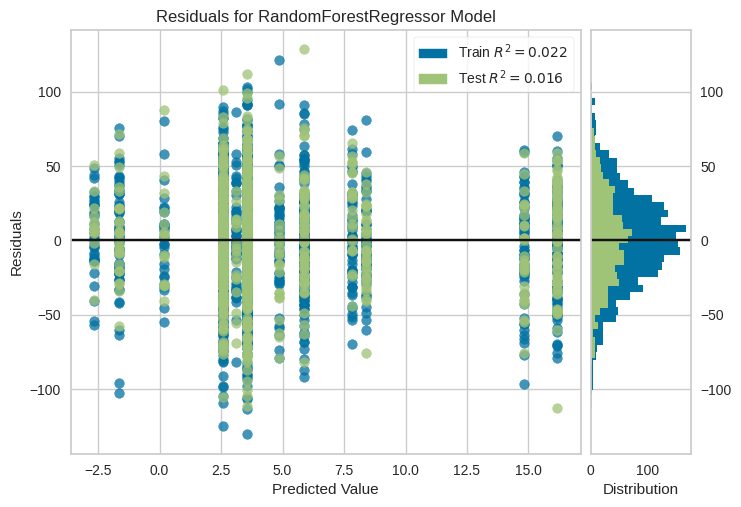

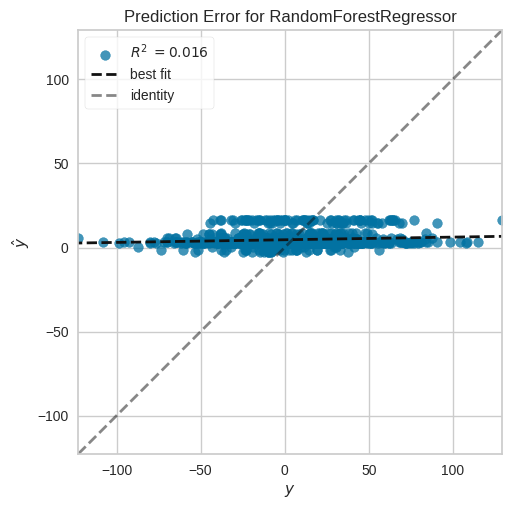

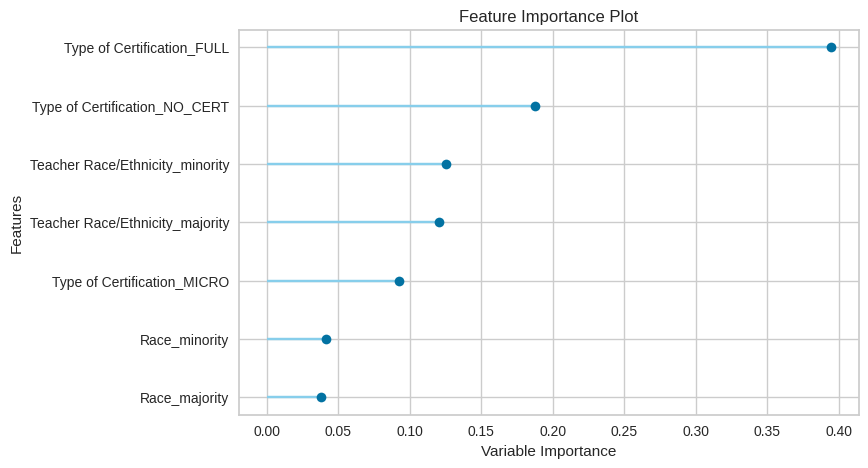

In [39]:
model = tuned_rf

plot_model(model)
plot_model(model, plot='error')
plot_model(model, plot='feature')